In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

In [24]:
picture_size = 32
folder_path = "images/"  
batch_size = 64
epochs = 20
no_of_classes = 7

In [25]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen_validation = ImageDataGenerator(rescale=1./255)


train_generator = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


print(f"Number of training samples: {train_generator.n}")
print(f"Number of validation samples: {validation_generator.n}")
print(f"Number of classes: {len(train_generator.class_indices)}")
print(f"Class indices: {train_generator.class_indices}")

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Number of training samples: 28821
Number of validation samples: 7066
Number of classes: 7
Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [26]:
def create_model(input_shape=(32, 32, 1), num_classes=7):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])
    return model


model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [31]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "emotion_model.keras", 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=3, 
    verbose=1, 
    restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=3, 
    verbose=1, 
    min_delta=0.0001
)

callbacks_list = [checkpoint,reduce_lr]

In [32]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.3763 - loss: 1.5936
Epoch 1: val_accuracy improved from -inf to 0.44233, saving model to emotion_model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 315s 689ms/step - accuracy: 0.3763 - loss: 1.5935 - val_accuracy: 0.4423 - val_loss: 1.4282 - learning_rate: 2.0000e-04
Epoch 2/20
  1/450 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.3750 - loss: 1.5144
Epoch 2: val_accuracy improved from 0.44233 to 0.61538, saving model to emotion_model.keras


C:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.3750 - loss: 1.5144 - val_accuracy: 0.6154 - val_loss: 1.3655 - learning_rate: 2.0000e-04
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.3967 - loss: 1.5606
Epoch 3: val_accuracy did not improve from 0.61538
450/450 ━━━━━━━━━━━━━━━━━━━━ 294s 648ms/step - accuracy: 0.3967 - loss: 1.5606 - val_accuracy: 0.4429 - val_loss: 1.4214 - learning_rate: 2.0000e-04
Epoch 4/20
  1/450 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.4375 - loss: 1.4222
Epoch 4: val_accuracy improved from 0.61538 to 0.65385, saving model to emotion_model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.4222 - val_accuracy: 0.6538 - val_loss: 1.1149 - learning_rate: 2.0000e-04
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.3970 - loss: 1.5458
Epoch 5: val_accuracy did not improve from 0.65385
450/450 ━━━━━━━━━━━━━━━━━━━━ 298s 656ms/step - accuracy: 0.3971 - loss: 1.5458 - val_accuracy: 0.4543

In [37]:
tf.saved_model.save(model, 'model.h5')

INFO:tensorflow:Assets written to: model.h5\assets


INFO:tensorflow:Assets written to: model.h5\assets


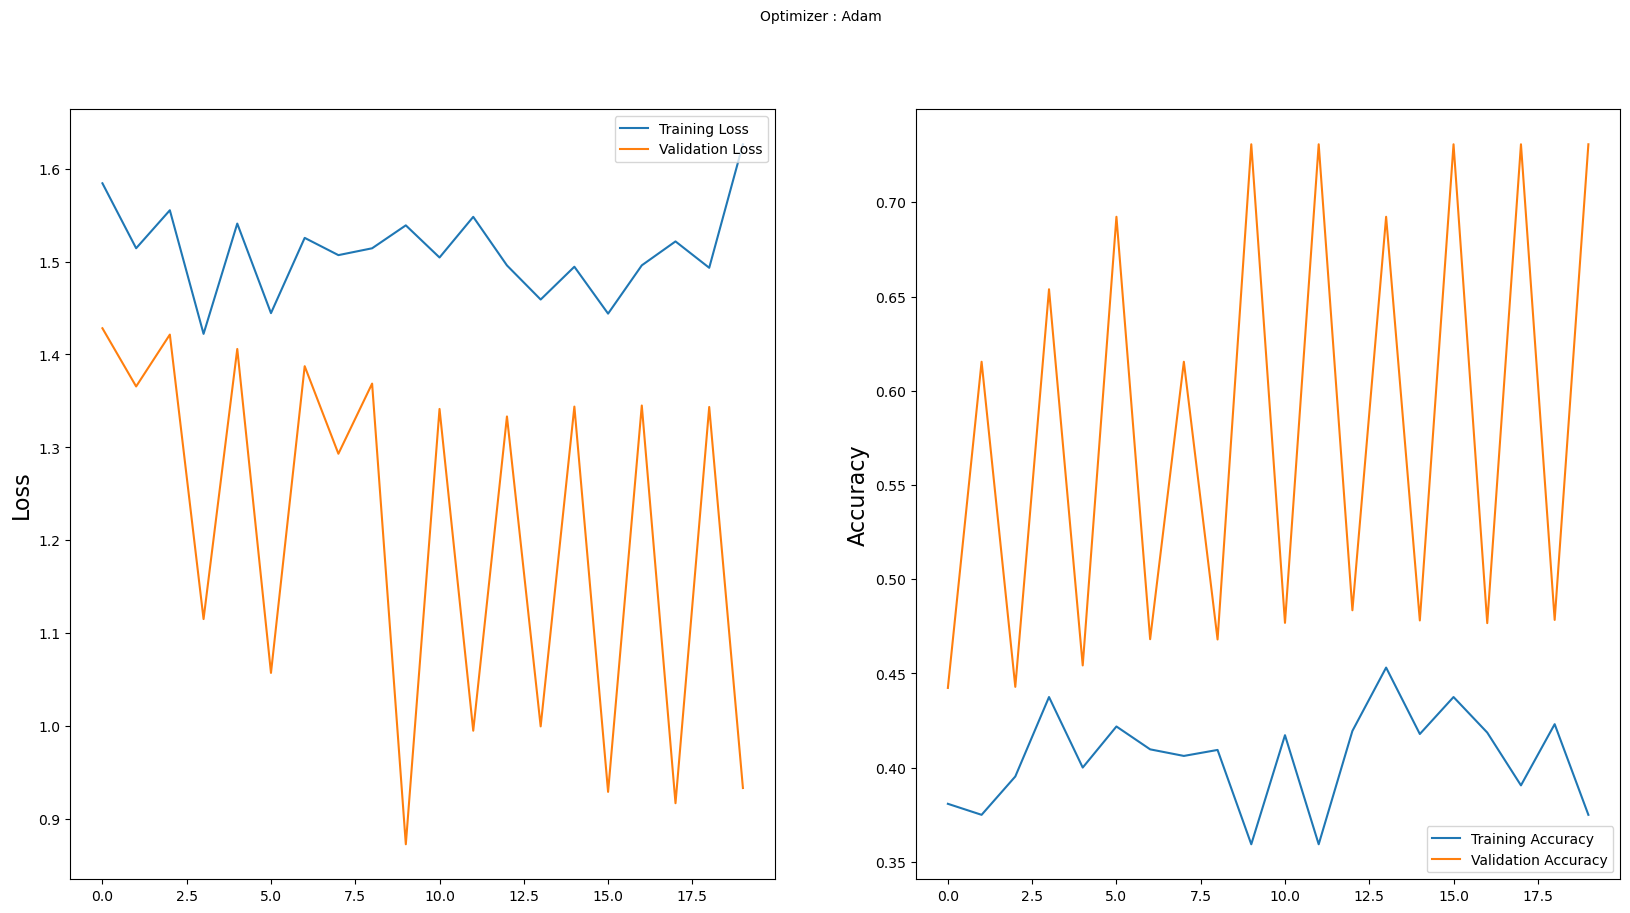

111/111 ━━━━━━━━━━━━━━━━━━━━ 56s 509ms/step - accuracy: 0.3841 - loss: 1.5276
Validation accuracy: 0.48


In [36]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {validation_accuracy:.2f}")